## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [6]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


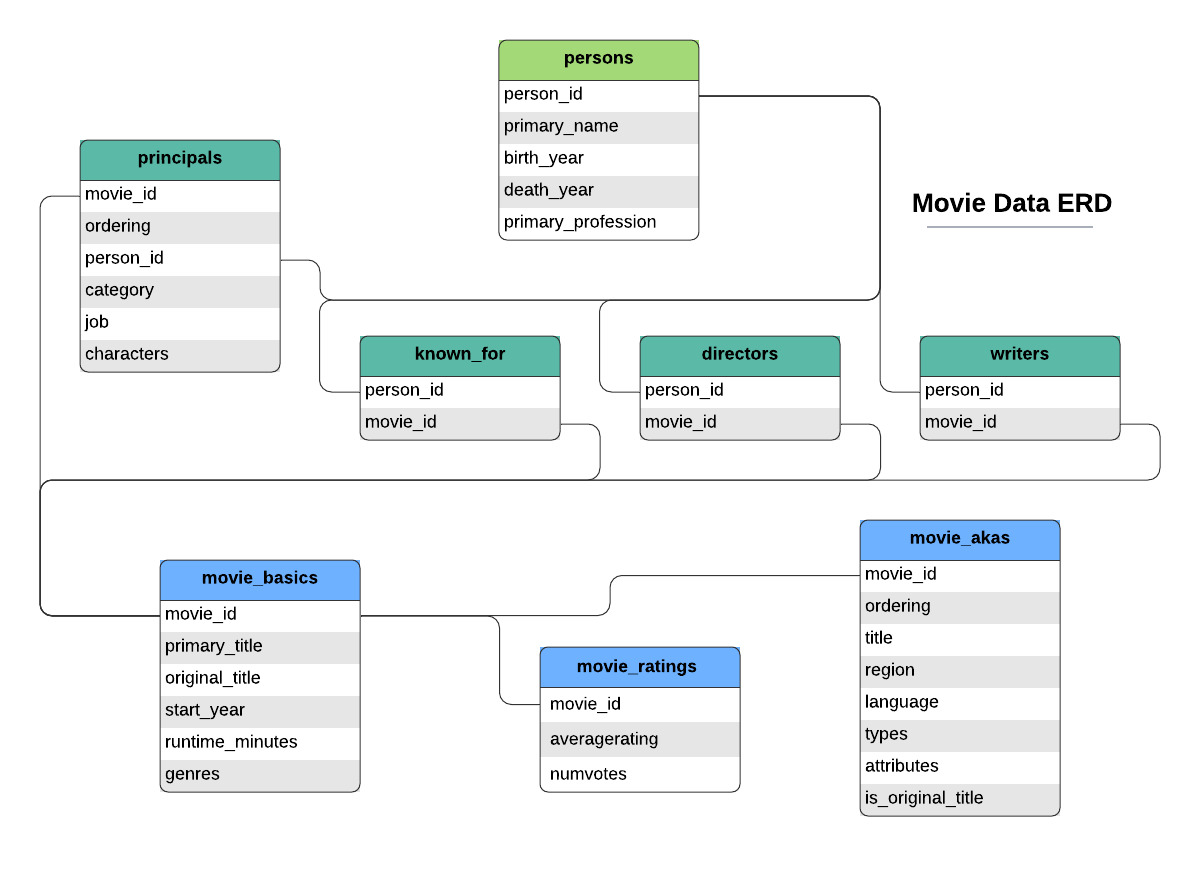

In [2]:
from IPython.display import Image
Image(filename='movie_data_erd.jpeg') 

In [3]:
master = pd.read_csv('masterdataset.csv')
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1459 non-null   int64  
 1   id                 1459 non-null   int64  
 2   release_date       1459 non-null   object 
 3   movie              1459 non-null   object 
 4   production_budget  1459 non-null   object 
 5   domestic_gross     1459 non-null   object 
 6   worldwide_gross    1459 non-null   object 
 7   year               1459 non-null   int64  
 8   movie_id           1459 non-null   object 
 9   original_title     1459 non-null   object 
 10  runtime_minutes    1459 non-null   float64
 11  genres             1459 non-null   object 
 12  averagerating      1459 non-null   float64
 13  numvotes           1459 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 159.7+ KB


In [4]:
master['numvotes'] #drop extra

0       447624.0
1        24451.0
2       665594.0
3       670926.0
4       329135.0
          ...   
1454        13.0
1455      5156.0
1456        82.0
1457       127.0
1458        85.0
Name: numvotes, Length: 1459, dtype: float64

In [5]:
master['genres'].value_counts()

Adventure,Animation,Comedy    67
Comedy                        53
Action,Adventure,Sci-Fi       52
Comedy,Drama,Romance          51
Drama                         50
                              ..
Action,Adventure               1
Comedy,Drama,History           1
Adventure,Comedy,Sci-Fi        1
Biography,Documentary          1
Action                         1
Name: genres, Length: 226, dtype: int64

In [6]:
master['worldwide_gross']

0       $1,045,663,875
1         $149,762,350
2       $1,403,013,963
3       $2,048,134,200
4         $655,945,209
             ...      
1454            $3,547
1455          $489,792
1456                $0
1457                $0
1458                $0
Name: worldwide_gross, Length: 1459, dtype: object

In [7]:
master['worldwide_gross'] = master['worldwide_gross'].str[1:]

In [8]:
master['worldwide_gross'] = master['worldwide_gross'].str.replace(',','')

In [9]:
master['worldwide_gross'] = master['worldwide_gross'].astype(int)

In [10]:
master['production_budget'] = master['production_budget'].str[1:]

In [11]:
master['production_budget'] = master['production_budget'].str.replace(',','')

In [12]:
master['production_budget'] = master['production_budget'].astype(int)

In [13]:
master['profit'] = master['worldwide_gross'] - master['production_budget']

In [14]:
master.sort_values('profit',ascending=False)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit
3,3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1748134200
23,23,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,2015,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1433854864
45,46,67,"Apr 3, 2015",Furious 7,190000000,"$353,007,020",1518722794,2015,tt2820852,Furious Seven,137.0,"Action,Crime,Thriller",7.2,335074.0,1328722794
18,18,27,"May 4, 2012",The Avengers,225000000,"$623,279,547",1517935897,2012,tt0848228,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1292935897
27,27,42,"Feb 16, 2018",Black Panther,200000000,"$700,059,566",1348258224,2018,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1148258224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,255,79,"Nov 24, 2010",The Nutcracker in 3D,90000000,"$195,459",20466016,2010,tt1041804,The Nutcracker in 3D,110.0,"Action,Family,Fantasy",4.3,3119.0,-69533984
241,253,78,"Apr 21, 2017",The Promise,90000000,"$8,224,288",10551417,2017,tt7232438,Puen Tee Raluek,114.0,"Drama,Horror,Thriller",6.1,629.0,-79448583
243,256,80,"Dec 13, 2017",Bright,90000000,$0,0,2017,tt5519340,Bright,117.0,"Action,Crime,Fantasy",6.4,147834.0,-90000000
122,124,94,"Mar 11, 2011",Mars Needs Moms,150000000,"$21,392,758",39549758,2011,tt1305591,Mars Needs Moms,88.0,"Adventure,Animation,Family",5.4,19823.0,-110450242


In [15]:
master['ROI'] = master['profit'] / master['production_budget'] * 100

In [16]:
master.sort_values('ROI',ascending=False)[0:50]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit,ROI
1436,1521,80,"Jul 10, 2015",The Gallows,100000,"$22,764,410",41656474,2015,tt2309260,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763.0,41556474,41556.474000
1349,1423,12,"Jan 6, 2012",The Devil Inside,1000000,"$53,262,945",101759490,2012,tt1560985,The Devil Inside,83.0,Horror,4.2,33522.0,100759490,10075.949000
1237,1303,65,"Oct 20, 2010",Paranormal Activity 2,3000000,"$84,752,907",177512032,2010,tt1536044,Paranormal Activity 2,91.0,Horror,5.7,93122.0,174512032,5817.067733
1151,1208,49,"Feb 24, 2017",Get Out,5000000,"$176,040,665",255367951,2017,tt5052448,Get Out,104.0,"Horror,Mystery,Thriller",7.7,400474.0,250367951,5007.359020
1325,1398,64,"Oct 21, 2016",Moonlight,1500000,"$27,854,931",65245512,2016,tt4975722,Moonlight,111.0,Drama,7.4,227964.0,63745512,4249.700800
1350,1424,18,"May 25, 2012",Chernobyl Diaries,1000000,"$18,119,640",42411721,2012,tt1991245,Chernobyl Diaries,86.0,"Horror,Mystery,Thriller",5.0,60304.0,41411721,4141.172100
1152,1209,51,"Oct 21, 2011",Paranormal Activity 3,5000000,"$104,028,807",207039844,2011,tt1778304,Paranormal Activity 3,83.0,"Horror,Mystery,Thriller",5.8,85689.0,202039844,4040.796880
1126,1182,84,"Oct 3, 2014",Annabelle,6500000,"$84,273,813",256862920,2014,tt3322940,Annabelle,99.0,"Horror,Mystery,Thriller",5.4,122039.0,250362920,3851.737231
1316,1389,15,"Aug 27, 2010",The Last Exorcism,1800000,"$41,034,350",70165900,2010,tt1320244,The Last Exorcism,87.0,"Drama,Horror,Thriller",5.6,45815.0,68365900,3798.105556
1062,1116,56,"Dec 21, 2016",Dangal,9500000,"$12,391,761",294654618,2016,tt5074352,Dangal,161.0,"Action,Biography,Drama",8.5,123638.0,285154618,3001.627558


In [17]:
master['ROI'].describe()

count     1459.000000
mean       270.845782
std       1217.930455
min       -100.000000
25%        -24.934980
50%        114.289910
75%        301.708344
max      41556.474000
Name: ROI, dtype: float64

Dropping certain values from certain columns to specify the results for visualization

These values we are dropping include: 

runtime_minutes below 75.0

production_budget below $10,000,000

numvotes below 1000


In [18]:
master = master[master['runtime_minutes'] >= 75.0]

In [19]:
master = master[master['production_budget'] >= 10000000]


In [20]:
master = master[master['numvotes'] >= 1000]


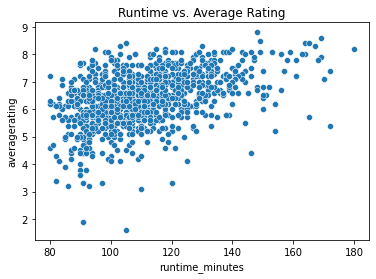

<Figure size 432x288 with 0 Axes>

In [21]:
sns.scatterplot(x='runtime_minutes', y='averagerating', data=master)
plt.title('Runtime vs. Average Rating')
plt.show()

plt.savefig("RuntimeVSaveragerating.jpeg", bbox_inches = 'tight')

Plot above is example, average runtime is 80-120 minutes for most successful films when looking through data. 

sum(profit) by genre and sum(production_budget) by genre then divide the two and do top 20 genre. 

In [25]:
sns.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

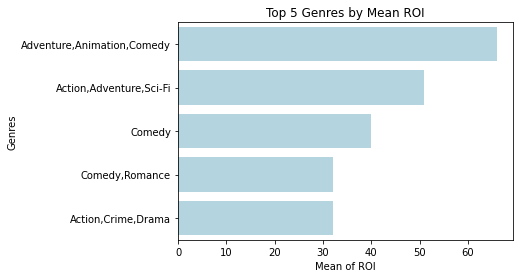

<Figure size 432x288 with 0 Axes>

In [36]:
# Group data by genre and calculate the mean of the 'ROI' column
mean_ROI_by_genre = master.groupby('genres')['ROI'].mean()

#Get top 20 genres based on mean ROI
top_5_genres = top_5_genres = master['genres'].value_counts().head()

# Create a bar chart of the mean ROI by genre
sns.barplot(x=top_5_genres.values, y=top_5_genres.index, color = 'lightblue')
plt.title('Top 5 Genres by Mean ROI')
plt.ylabel('Genres')
plt.xlabel('Mean of ROI')
plt.show()


plt.savefig("Top5_Genre_Mean_ROI.jpeg", bbox_inches = 'tight')


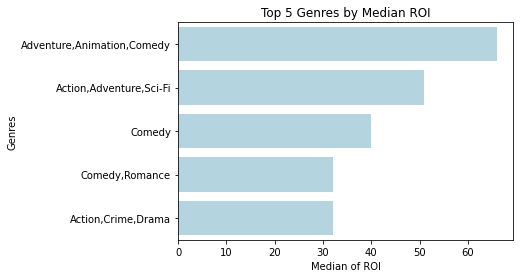

<Figure size 432x288 with 0 Axes>

In [35]:
# Group the data by genre and calculate the median of the 'ROI' column
median_ROI_by_genre = master.groupby('genres')['ROI'].median()

# Get the top 20 genres based on median ROI
top_5_genres_median = master['genres'].value_counts().head()

# Create a bar chart of the top 20 genres based on median ROI
sns.barplot(x=top_5_genres_median.values, y=top_5_genres_median.index, color= 'lightblue')
plt.title('Top 5 Genres by Median ROI')
plt.ylabel('Genres')
plt.xlabel('Median of ROI')
plt.show()

plt.savefig("Top5_Genre_Median_ROI.jpeg", bbox_inches = 'tight')


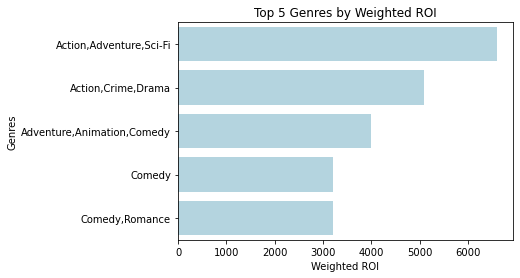

<Figure size 432x288 with 0 Axes>

In [34]:
#Adjust genre_count to only included over 5 in Genre chart
genre_counts = master['genres'].value_counts()
filtered_genres = genre_counts[genre_counts > 5].index

master = master[master['genres'].isin(filtered_genres)]


#Grouped data by genre as well as calculaed the sum of profit and production budget
profit_by_genre = master.groupby('genres')['profit'].sum()
budget_by_genre = master.groupby('genres')['production_budget'].sum()

#Weighted ROI
weighted_roi = profit_by_genre/budget_by_genre


#Top 20 genres from weighted ROI
top_5_genres = master['genres'].value_counts().head()


#Create barchart of top 20 genres by profit_to_budget_ratio
sns.barplot(x=top_5_genres*100, y=top_5_genres.index.sort_values(), color='lightblue')
plt.title('Top 5 Genres by Weighted ROI')
plt.ylabel('Genres')
plt.xlabel('Weighted ROI')
plt.show()

plt.savefig("Top5_Genre_Weighted_ROI.jpeg", bbox_inches = 'tight')



In [33]:
top5_genre = master['genres'].value_counts().head()
top5_genre

Adventure,Animation,Comedy    66
Action,Adventure,Sci-Fi       51
Comedy                        40
Comedy,Romance                32
Action,Crime,Drama            32
Name: genres, dtype: int64

In [29]:
budget_by_genre[top_10_genres.index]

genres
Horror,Thriller                189000000
Horror,Mystery,Thriller        246000000
Comedy,Drama,Music             139000000
Action,Sci-Fi,Thriller         412000000
Action,Adventure,Comedy       2070000000
Adventure,Animation,Comedy    6855500000
Action,Adventure,Animation    1919000000
Action,Adventure,Sci-Fi       9002600000
Biography,Drama,History        509000000
Action,Crime,Thriller         1271000000
Name: production_budget, dtype: int64

Graphs of Mean and Median Profits by Runtime

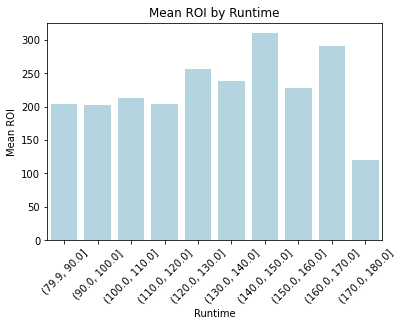

<Figure size 432x288 with 0 Axes>

In [162]:
master['runtime_bins'] = pd.cut(master['runtime_minutes'], bins=10)

mean_ROI_by_runtime_bin = master.groupby('runtime_bins')['ROI'].mean()

sns.barplot(x= mean_ROI_by_runtime_bin.index ,y= mean_ROI_by_runtime_bin, color='lightblue')

plt.ylabel('Mean ROI')
plt.xlabel('Runtime')
plt.title('Mean ROI by Runtime')
plt.xticks(rotation=45)

plt.show()


plt.savefig("Mean_Profit_Runtime.jpeg", bbox_inches = 'tight')




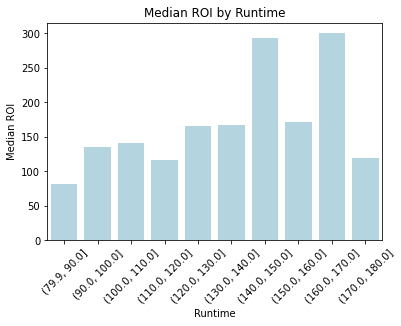

<Figure size 432x288 with 0 Axes>

In [164]:
master['runtime_bins'] = pd.cut(master['runtime_minutes'], bins=10)

median_ROI_by_runtime_bin = master.groupby('runtime_bins')['ROI'].median()

sns.barplot(x= median_ROI_by_runtime_bin.index ,y= median_ROI_by_runtime_bin, color='lightblue')

plt.xlabel('Runtime')
plt.ylabel('Median ROI')
plt.title('Median ROI by Runtime')
plt.xticks(rotation=45)

plt.show()


plt.savefig("Median_ROI_Runtime.jpeg", bbox_inches = 'tight')


In [32]:
master['profit'].mean()

146451455.83267975

In [33]:
master['profit'].median()

56763758.0

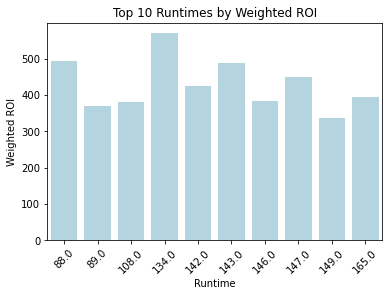

<Figure size 432x288 with 0 Axes>

In [58]:
#Grouped data by genre as well as calculaed the sum of profit and production budget
profit_by_runtime = master.groupby('runtime_minutes')['profit'].sum()
budget_by_runtime = master.groupby('runtime_minutes')['production_budget'].sum()

#Weighted ROI
weighted_roi = profit_by_runtime/budget_by_runtime


#Top 20 genres from weighted ROI
top_10_runtime = weighted_roi.nlargest(10)


#Create barchart of top 20 genres by profit_to_budget_ratio
sns.barplot(x=top_10_runtime.index, y=top_10_runtime.sort_values()*100, color='lightblue')
plt.title('Top 10 Runtimes by Weighted ROI')
plt.xlabel('Runtime')
plt.ylabel('Weighted ROI')
plt.xticks(rotation=45)
plt.show()

plt.savefig("Top10_Runtimes_Weighted_ROI.jpeg", bbox_inches = 'tight')



Graphs of Mean and Median Profits by Rating

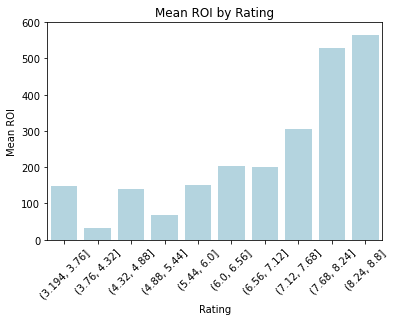

<Figure size 432x288 with 0 Axes>

In [174]:
master['rating'] = pd.cut(master['averagerating'], bins=10)

mean_ROI_by_rating_bin = master.groupby('rating')['ROI'].mean()

sns.barplot(x= mean_ROI_by_rating_bin.index, y= mean_ROI_by_rating_bin, color='lightblue')

plt.ylim(0, 600)
plt.xlabel('Rating')
plt.ylabel('Mean ROI')
plt.title('Mean ROI by Rating')
plt.xticks(rotation=45)


plt.show()

plt.savefig("Mean_ROI_Rating.jpeg", bbox_inches = 'tight')



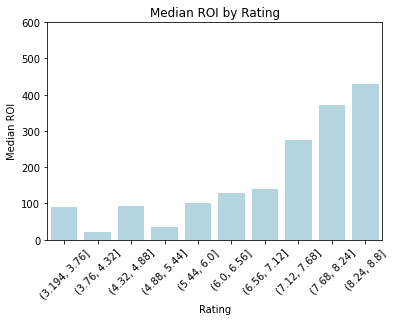

<Figure size 432x288 with 0 Axes>

In [175]:
master['rating'] = pd.cut(master['averagerating'], bins=10)

median_ROI_by_rating_bin = master.groupby('rating')['ROI'].median()

sns.barplot(x= median_ROI_by_rating_bin.index, y= median_ROI_by_rating_bin, color='lightblue')

plt.ylim(0, 600)
plt.xlabel('Rating')
plt.ylabel('Median ROI')
plt.title('Median ROI by Rating')
plt.xticks(rotation=45)


plt.show()

plt.savefig("Median_ROI_Rating.jpeg", bbox_inches = 'tight')



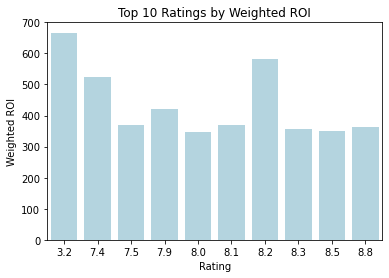

<Figure size 432x288 with 0 Axes>

In [177]:
#Grouped data by genre as well as calculaed the sum of profit and production budget
profit_by_rating = master.groupby('averagerating')['profit'].sum()
budget_by_rating = master.groupby('averagerating')['production_budget'].sum()

#Weighted ROI
weighted_roi = profit_by_rating/budget_by_rating


#Top 20 genres from weighted ROI
top_10_rating = weighted_roi.nlargest(10)


#Create barchart of top 20 genres by profit_to_budget_ratio
sns.barplot(x=top_10_rating.index, y=top_10_rating.sort_values()*100, color='lightblue')
plt.ylim(0, 700)
plt.title('Top 10 Ratings by Weighted ROI')
plt.xlabel('Rating')
plt.ylabel('Weighted ROI')
plt.show()

plt.savefig("Top10_Ratings_Weighted_ROI.jpeg", bbox_inches = 'tight')



In [38]:
master.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,profit,ROI,runtime_bins,rating
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624.0,635063875,154.667286,135.0,"(6.56, 7.12]"
1,1,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0,-200237650,-57.210757,115.0,"(5.44, 6.0]"
2,2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,1072413963,324.384139,145.0,"(7.12, 7.68]"
3,3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1748134200,582.711400,145.0,"(8.24, 8.8]"
4,4,9,"Nov 17, 2017",Justice League,300000000,"$229,024,295",655945209,2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135.0,355945209,118.648403,115.0,"(6.0, 6.56]"


ROI = Net income / Cost of investment x 100